In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

TRAIN_PATH = "PM25_train.csv"

## Pandas Datatype
### Dataframe
* Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns).
* Arithmetic operations align on both row and column labels. 
* Can be thought of as a dict-like container for Series objects. The primary pandas data structure

### Series
* Series is the datastructure for a single column of a DataFrame
* The data in a DataFrame is actually stored in memory as a collection of Series

In [2]:
import pandas as pd
TRAIN_PATH = "PM25_train.csv"
TEST_PATH = "PM25_test.csv"
df_train_data = pd.read_csv(TRAIN_PATH, engine="python")
df_test_data = pd.read_csv(TEST_PATH, engine="python")
series_data = df_train_data["Date"]
df_train_data.head(-1116551)

,device_id,Date,Time,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon
0,28C2DDDD415C,2017-01-01,08:03:09,21.0,0.0,0.0,24.12,83.0,23.741,120.755
1,28C2DDDD415C,2017-01-01,08:03:09,21.0,0.0,0.0,24.12,83.0,23.741,120.755
2,28C2DDDD415C,2017-01-01,08:03:09,21.0,0.0,0.0,24.12,83.0,23.741,120.755


In [3]:
print(series_data)

0          2017-01-01
1          2017-01-01
2          2017-01-01
3          2017-01-01
4          2017-01-01
5          2017-01-01
6          2017-01-01
7          2017-01-01
8          2017-01-01
9          2017-01-01
10         2017-01-01
11         2017-01-01
12         2017-01-01
13         2017-01-01
14         2017-01-01
15         2017-01-01
16         2017-01-01
17         2017-01-01
18         2017-01-01
19         2017-01-01
20         2017-01-01
21         2017-01-01
22         2017-01-01
23         2017-01-01
24         2017-01-01
25         2017-01-01
26         2017-01-01
27         2017-01-01
28         2017-01-01
29         2017-01-01
              ...    
1116524    2017-01-30
1116525    2017-01-30
1116526    2017-01-30
1116527    2017-01-30
1116528    2017-01-30
1116529    2017-01-30
1116530    2017-01-30
1116531    2017-01-30
1116532    2017-01-30
1116533    2017-01-30
1116534    2017-01-30
1116535    2017-01-30
1116536    2017-01-30
1116537    2017-01-30
1116538   

In [4]:
print(type(df_train_data))
print(type(series_data))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


## Pandas index
### .loc()
* Primarily label based.
    * A single label
    * A list or array of labels
    * A slice object with labels

### .iloc()
* Primarily integer position based
    * An integer
    * A list or array of integers
    * A slice object with integers

In [5]:
df_date_time = df_train_data.loc[0:2, "Date":"Time"]
df_index_0_10 = df_train_data.iloc[0:3,1:3]

In [6]:
df_date_time.head()

,Date,Time
0,2017-01-01,08:03:09
1,2017-01-01,08:03:09
2,2017-01-01,08:03:09


In [7]:
df_index_0_10.head()

,Date,Time
0,2017-01-01,08:03:09
1,2017-01-01,08:03:09
2,2017-01-01,08:03:09


## Dataframe groupby
* Group DataFrame or Series 
* Involves some combination of splitting the object
    * Applying a function, and combining the results.   
* This can be used to group large amounts of data and compute operations on these groups.

In [8]:
df_group_device_date = df_train_data.groupby(["Date", "Time"], level=None)

In [9]:
df_train_data.head(10)

,device_id,Date,Time,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon
0,28C2DDDD415C,2017-01-01,08:03:09,21.0,0.0,0.0,24.12,83.0,23.741,120.755
1,28C2DDDD415C,2017-01-01,08:03:09,21.0,0.0,0.0,24.12,83.0,23.741,120.755
2,28C2DDDD415C,2017-01-01,08:03:09,21.0,0.0,0.0,24.12,83.0,23.741,120.755
3,28C2DDDD415C,2017-01-01,08:09:04,20.0,0.0,0.0,24.12,82.0,23.741,120.755
4,28C2DDDD415C,2017-01-01,08:09:04,20.0,0.0,0.0,24.12,82.0,23.741,120.755
5,28C2DDDD415C,2017-01-01,08:26:51,20.0,0.0,0.0,24.37,81.0,23.741,120.755
6,28C2DDDD415C,2017-01-01,08:26:51,20.0,0.0,0.0,24.37,81.0,23.741,120.755
7,28C2DDDD415C,2017-01-01,08:32:47,20.0,0.0,0.0,24.50,81.0,23.741,120.755
8,28C2DDDD415C,2017-01-01,08:32:47,20.0,0.0,0.0,24.50,81.0,23.741,120.755
9,28C2DDDD415C,2017-01-01,08:38:42,22.0,0.0,0.0,24.62,81.0,23.741,120.755


You can show information in this group

In [10]:
df_group_device_date.size()
#df = pd.DataFrame({'Animal': ['Falcon', 'Falcon','Parrot', 'Parrot'],'Max Speed': [380., 380., 24., 26.]})
#print(df.groupby(['Animal','Max Speed']).size())

Date        Time    
2017-01-01  08:00:01    3
            08:00:04    3
            08:00:05    3
            08:00:06    3
            08:00:12    6
            08:00:15    6
            08:00:18    3
            08:00:20    3
            08:00:22    3
            08:00:23    6
            08:00:24    3
            08:00:26    6
            08:00:30    3
            08:00:35    3
            08:00:37    6
            08:00:40    6
            08:00:44    3
            08:00:47    3
            08:00:48    3
            08:00:51    3
            08:00:57    3
            08:00:59    3
            08:01:01    3
            08:01:04    6
            08:01:07    3
            08:01:10    3
            08:01:11    3
            08:01:12    3
            08:01:14    3
            08:01:17    3
                       ..
2017-01-30  23:58:55    1
            23:59:00    2
            23:59:03    1
            23:59:05    1
            23:59:07    1
            23:59:08    2
            23:59

In [11]:
df_group_device_date.mean()

PM2.5  PM10   PM1  Temperature  Humidity      lat  \
Date       Time                                                          
2017-01-01 08:00:01   39.0  46.0  28.0       23.620      77.0  24.1670   
           08:00:04   78.0  95.0  57.0       22.250      82.0  23.9610   
           08:00:05   57.0  74.0  39.0       21.250      89.0  24.1840   
           08:00:06   30.0  34.0  24.0       21.620      78.0  24.3040   
           08:00:12   46.5  58.0  33.5       25.435      68.0  24.1980   
           08:00:15   36.5  44.5  26.5       23.870      74.5  24.1970   
           08:00:18   65.0  78.0  48.0       22.120      86.0  24.2010   
           08:00:20   11.0  12.0   8.0       25.500      62.0  24.2520   
           08:00:22   55.0  66.0  38.0       21.370      89.0  24.1980   
           08:00:23   34.0  40.0  25.5       22.375      80.5  24.2270   
           08:00:24   59.0  78.0  42.0       22.000      92.0  25.0620   
           08:00:26   47.0  60.5  35.0       22.060      88.0  24.1685   
           08:00:30   54.0  68.0  37.0       24.250      77.0  24.1350   
           08:00:35   54.0  71.0  38.0       20.250      89.0  24.1850   
           08:00:37   48.5  62.0  34.0       24.185      73.5  24.1340   
           08:00:40   40.5  49.5  29.0       20.685      82.0  24.1375   
           08:00:44   63.0  76.0  46.0       22.250      84.0  24.1910   
           08:00:47   37.0  48.0  27.0       24.620      68.0  24.1910   
           08:00:48   45.0  56.0  32.0       21.750      83.0  24.3140   
           08:00:51   54.0  71.0  38.0       25.250      79.0  24.1470   
           08:00:57   38.0  46.0  27.0       21.620      81.0  24.2160   
           08:00:59   62.0  83.0  44.0       21.620     100.0  24.1400   
           08:01:01   52.0  58.0  46.0       20.750      76.0  24.3080   
           08:01:04   51.5  64.5  37.5       23.685      76.5  24.1275   
           08:01:07   51.0  66.0  36.0       22.500      78.0  24.2160   
           08:01:10   61.0  77.0  46.0       21.750      89.0  24.1090   
           08:01:11   26.0  31.0  18.0       22.870      82.0  24.3370   
           08:01:12   47.0  59.0  33.0       21.750      76.0  24.2230   
           08:01:14   57.0  75.0  42.0       23.120      91.0  24.1740   
           08:01:17   48.0  61.0  32.0       21.750      86.0  24.2250   
...                    ...   ...   ...          ...       ...      ...   
2017-01-30 23:58:55   35.0  43.0  24.0       22.500      63.0  24.0870   
           23:59:00   15.5  17.0  12.5       24.810      62.5  24.1865   
           23:59:03   14.0  16.0  11.0       22.000      65.0  24.1860   
           23:59:05   11.0  14.0   8.0       19.000      84.0  24.1880   
           23:59:07   42.0  51.0  30.0       18.870      83.0  24.2790   
           23:59:08   13.5  15.0   9.5       23.745      71.5  24.1150   
           23:59:09   13.0  16.0   9.0       20.250      71.0  24.1710   
           23:59:10   19.0  23.0  14.0       21.120      69.0  24.1150   
           23:59:11   15.0  16.0  11.0       23.870      64.0  24.0180   
           23:59:13   16.5  18.5  12.5       22.185      67.5  24.2315   
           23:59:14   14.0  16.0  10.0       21.120      74.0  24.0700   
           23:59:19   17.5  20.0  13.0       21.500      68.5  24.1910   
           23:59:21   10.0  12.0   7.0       22.870      74.0  24.2540   
           23:59:24   12.0  14.0   8.0       24.250      60.0  24.1620   
           23:59:25   16.0  19.0  12.0       19.000      77.0  24.2370   
           23:59:26   16.0  17.0  12.0       21.250      73.0  24.1120   
           23:59:28    5.0   5.0   3.0       18.370     100.0  24.2190   
           23:59:29   16.5  19.0  11.5       20.125      74.5  24.1390   
           23:59:30   11.0  12.0   9.0       23.870      60.0  24.1680   
           23:59:31   18.0  21.0  12.0       18.870      78.0  24.1850   
           23:59:35    3.0   3.0   2.0       28.370      54.0  24.1340   
           23:59:41   25.

## Plot

In [12]:
df_train_data_clean = df_train_data.drop_duplicates()
df_train_data_clean = df_train_data_clean.drop(["Time"], axis=1)
df_date = df_train_data_clean.groupby(["Date"], level=None).mean()
df_date.head()

,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon
Date,,,,,,,
2017-01-01,45.157928,56.229639,31.739596,25.329275,78.371420,24.187586,120.677072
2017-01-02,51.414076,64.685130,35.400906,24.875585,80.871692,24.187439,120.675716
2017-01-03,46.608319,58.244836,32.404124,25.213421,78.981953,24.187011,120.675146
2017-01-04,47.205856,59.582033,32.460708,25.721296,80.257397,24.179774,120.668991
2017-01-05,62.522039,78.181748,42.303857,25.209739,81.900799,24.182583,120.672458


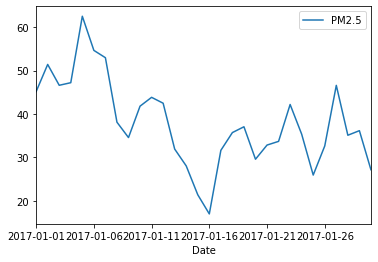

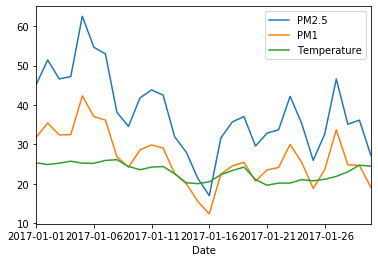

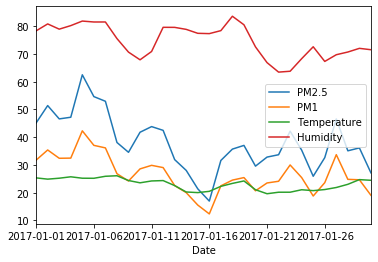

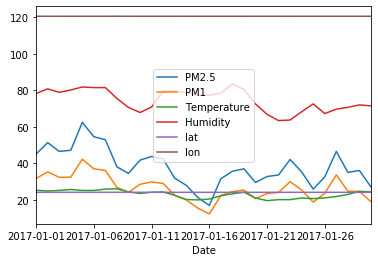

In [13]:
df_date.plot.line(y="PM2.5")
df_date.plot.line(y=["PM2.5", "PM1", "Temperature"])
df_date.plot.line(y=["PM2.5", "PM1", "Temperature", "Humidity"])
df_date.plot.line(y=["PM2.5", "PM1", "Temperature", "Humidity", "lat", "lon"])

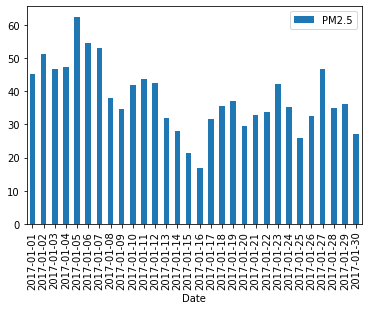

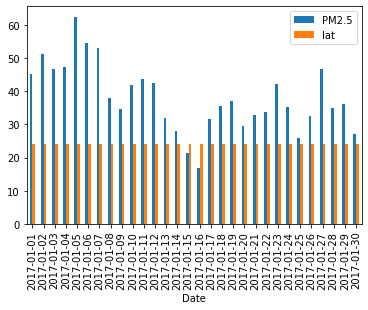

In [14]:
df_date.plot.bar(y='PM2.5')
df_date.plot.bar(y=['PM2.5', 'lat'])

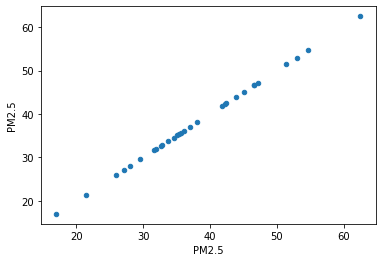

In [15]:
df_date.plot.scatter(x='PM2.5', y='PM2.5')

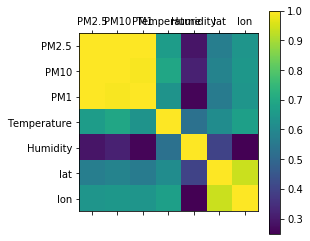

In [16]:
plt.matshow(df_date.corr())
plt.xticks(range(len(df_date.columns)), df_date.columns)
plt.yticks(range(len(df_date.columns)), df_date.columns)
plt.colorbar()
plt.show()

> Because PM10 and PM1.0 are empty

## Reset_index

In [17]:
df_train_data_clean.head()

,device_id,Date,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon
0,28C2DDDD415C,2017-01-01,21.0,0.0,0.0,24.12,83.0,23.741,120.755
3,28C2DDDD415C,2017-01-01,20.0,0.0,0.0,24.12,82.0,23.741,120.755
5,28C2DDDD415C,2017-01-01,20.0,0.0,0.0,24.37,81.0,23.741,120.755
7,28C2DDDD415C,2017-01-01,20.0,0.0,0.0,24.50,81.0,23.741,120.755
9,28C2DDDD415C,2017-01-01,22.0,0.0,0.0,24.62,81.0,23.741,120.755


In [18]:
df_train_data_clean = df_train_data_clean.reset_index(drop=True)
df_train_data_clean.head()

,device_id,Date,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon
0,28C2DDDD415C,2017-01-01,21.0,0.0,0.0,24.12,83.0,23.741,120.755
1,28C2DDDD415C,2017-01-01,20.0,0.0,0.0,24.12,82.0,23.741,120.755
2,28C2DDDD415C,2017-01-01,20.0,0.0,0.0,24.37,81.0,23.741,120.755
3,28C2DDDD415C,2017-01-01,20.0,0.0,0.0,24.50,81.0,23.741,120.755
4,28C2DDDD415C,2017-01-01,22.0,0.0,0.0,24.62,81.0,23.741,120.755


## Train Regression

### Data Preprocessing

In [19]:
df_train_data_clean = df_train_data_clean.groupby(["device_id", "Date"], level=None).mean()
df_train_data_clean.head()

PM2.5  PM10  PM1  Temperature   Humidity     lat  \
device_id    Date                                                               
28C2DDDD415C 2017-01-01  16.947761   0.0  0.0    26.808881  72.768657  23.741   
             2017-01-02  33.263158   0.0  0.0    25.061421  81.178947  23.741   
             2017-01-03  27.547945   0.0  0.0    24.579315  93.993151  23.741   
             2017-01-04  17.487310   0.0  0.0    26.476548  85.685279  23.741   
             2017-01-05  53.893401   0.0  0.0    26.106142  83.796954  23.741   

                             lon  
device_id    Date                 
28C2DDDD415C 2017-01-01  120.755  
             2017-01-02  120.755  
             2017-01-03  120.755  
             2017-01-04  120.755  
             2017-01-05  120.755

In [20]:
Train_X = df_train_data_clean.copy()
Train_X = Train_X.drop(["PM2.5"], axis=1)
Train_X.head()

PM10  PM1  Temperature   Humidity     lat      lon
device_id    Date                                                          
28C2DDDD415C 2017-01-01   0.0  0.0    26.808881  72.768657  23.741  120.755
             2017-01-02   0.0  0.0    25.061421  81.178947  23.741  120.755
             2017-01-03   0.0  0.0    24.579315  93.993151  23.741  120.755
             2017-01-04   0.0  0.0    26.476548  85.685279  23.741  120.755
             2017-01-05   0.0  0.0    26.106142  83.796954  23.741  120.755

In [21]:
Train_Y = df_train_data_clean["PM2.5"]
Train_Y.head()

device_id     Date      
28C2DDDD415C  2017-01-01    16.947761
              2017-01-02    33.263158
              2017-01-03    27.547945
              2017-01-04    17.487310
              2017-01-05    53.893401
Name: PM2.5, dtype: float64

### Training model

In [22]:
reg = LinearRegression().fit(Train_X, Train_Y)

In [23]:
#score = reg.score(Train_X.loc[:,"Temperature":"Humidity"], Train_Y)
score = reg.score(Train_X, Train_Y)
print(score)

0.9365701777627441


In [24]:
df_test_data_clean = df_test_data.drop_duplicates()
df_test_data_clean = df_test_data_clean.drop(["Time"], axis=1)
df_test_data_clean = df_test_data_clean.reset_index(drop=True)
df_test_data_clean = df_test_data_clean.groupby(["device_id", "Date"], level=None).mean()
Test_X = df_test_data_clean.copy()
pred_Y = reg.predict(Test_X)
print(pred_Y)

[ 7.70780275  4.14246894 18.5320843  16.21052564 17.78019467 12.71383225
 16.08115911 19.4069949  15.78828982 17.90722767 14.37857005 15.91685081
 14.29681939 21.18847118 19.86565467 13.80702126 14.73187625 17.90760353
 14.9131837  16.30312665 20.61582641 18.31946423 19.22990505 22.28136609
 21.63318083 22.10921338 14.07579301 14.44040293 14.81529825 17.41126051
 20.05754001 12.32151981 15.76338719 24.90744416 14.42126394 16.58764873
 10.07528815 26.08487374 16.72465251 19.87417348 15.38281558 18.98051334
 19.9590365  17.51361162 13.95884493 23.30143942 19.10099526 14.54586196
 15.81539809 18.86365187 15.26994484 15.72979399 26.14005548 22.74726784
 19.23210054 18.88913817 19.7166808  27.94474774 11.44190124 13.54073244
 26.54454627 13.07139183 26.16484821 18.35129343 13.96998134 16.256959
 19.32292964 19.99341543  9.892616   15.93756696 19.65435826 15.78204207
 15.01630284 20.74529836 14.93611444 16.60748821 18.41515204 11.78500258
 14.72380514 16.29343156 11.21171831 12.15718202 18.0

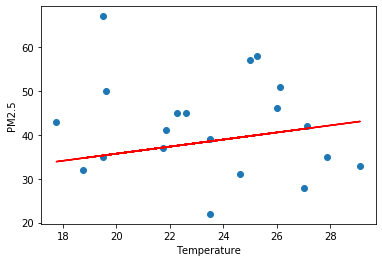

In [25]:
from random import shuffle
X = df_train_data.iloc[:,6].values.reshape(-1, 1) #Temperature
Y = df_train_data.iloc[:,3].values.reshape(-1, 1) #PM2.5
temp = list(zip(X,Y))
shuffle(temp)
X,Y = zip(*temp)
Train_X = X[:-20]
Test_X = X[-20:]
Train_Y = Y[:-20] 
Test_Y = Y[-20:] 
reg = LinearRegression().fit(Train_X, Train_Y)
pred_Y = reg.predict(Test_X)
plt.scatter(Test_X , Test_Y)
plt.plot(Test_X, pred_Y, color='red')
plt.xlabel("Temperature")
plt.ylabel("PM2.5")
plt.show()